In [48]:
!pip install torch


In [49]:
!pip install scikit-learn


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
class DLModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(36*6,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128)
            
        )

    def forward(self, x):
        return self.layers(x)
    

In [22]:
class DLModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(36*6,2048),
            nn.ReLU(),
            nn.Linear(2048,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128)
        
        )

    def forward(self,x):
        return self.layers(x)

In [28]:
class DLModel3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(36*6,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,128)
        )

    def forward(self,x):
        return self.layers(x)
                

In [84]:
class DLModel4(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(36*6,2048),
            nn.ReLU(),
            nn.Linear(2048,1024),
            nn.ReLU(),
            nn.Linear(1024,128)
            
        )

    def forward(self,x):
        return self.layers(x)

In [51]:
class DLModel5(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(36*6,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128,128)
            
        )

    def forward(self,x):
        return self.layers(x)

In [73]:
class DLModel6(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(36*6,2048),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(2048,1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024,128)
            
        )

    def forward(self,x):
        return self.layers(x)

In [82]:

class RNNModel(nn.Module):
    def __init__(self, input_size=36*6, hidden_size=256, output_size=128, num_layers=4, dropout_rate=0.5):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # Set initial hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate RNN
        out, _ = self.rnn(x, h0)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out


In [155]:
class CNNModel1(nn.Module):
    def __init__(self):
        super(CNNModel1,self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(16*108 , 128)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = torch.flatten(x,1)
        x = self.dropout(x)
        x = self.fc1(x)
        return x

In [130]:
class CNNModel2(nn.Module):
    def __init__(self):
        super(CNNModel2,self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32*54 , 128)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = self.dropout(x)
        x = self.fc1(x)
        return x

In [134]:
class CNNModel3(nn.Module):
    def __init__(self):
        super(CNNModel3,self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128*13 , 128)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = torch.flatten(x,1)
        x = self.dropout(x)
        x = self.fc1(x)
        return x

In [288]:

class CNNModel4(nn.Module):
    def __init__(self):
        super(CNNModel4, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.batch_norm1 = nn.BatchNorm1d(16)
        self.batch_norm2 = nn.BatchNorm1d(32)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32 * 54, 128)  # Adjusted for additional pooling layer
        self.fc2 = nn.Linear(128, 128)  # Additional fully connected layer
        self.fc3 = nn.Linear(128, 128)    # Output layer

    def forward(self, x):
        x = self.pool(self.relu(self.batch_norm1(self.conv1(x))))
        x = self.pool(self.relu(self.batch_norm2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x



In [314]:

class CNNModelCustom(nn.Module):
    def __init__(self):
        super(CNNModelCustom, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=5, padding=2)  # Assuming input is a 2D representation
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.batch_norm2 = nn.BatchNorm1d(128)
        self.batch_norm3 = nn.BatchNorm1d(256)
        
        self.leaky_relu = nn.LeakyReLU(0.4)
        self.dropout = nn.Dropout(0.4)
        
        self.fc1 = nn.Linear(256*216, 1000)  # Adjusted for input size
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 128)  # Output layer for regression
        
    def forward(self, x):
        x = self.leaky_relu(self.batch_norm1(self.conv1(x)))
        x = self.leaky_relu(self.batch_norm2(self.conv2(x)))
        x = self.leaky_relu(self.batch_norm3(self.conv3(x)))
        
        x = torch.flatten(x, 1)  # Flattening for the fully connected layers
        x = self.dropout(x)
        
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        
        return x


In [331]:
import torch
import torch.nn as nn

class CNNModel5(nn.Module):
    def __init__(self):
        super(CNNModel5, self).__init__()
        self.conv1 = nn.Conv1d(1, 128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(256, 512, kernel_size=3, padding=1)  # Additional conv layer
        self.conv4 = nn.Conv1d(512,1024, kernel_size=3, padding=1)
        self.conv5 = nn.Conv1d(1024,2048, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.batch_norm2 = nn.BatchNorm1d(256)
        self.batch_norm3 = nn.BatchNorm1d(512)  # Batch norm for additional conv layer
        self.batch_norm4 = nn.BatchNorm1d(1024)
        self.batch_norm5 = nn.BatchNorm1d(2048)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 108, 1024)  # Adjusted for additional conv and pooling layers
        self.fc2 = nn.Linear(1024, 256)  # Additional fully connected layer
        self.fc3 = nn.Linear(256, 128)  # Output layer

    def forward(self, x):
        x = self.pool(self.relu(self.batch_norm1(self.conv1(x))))
        x = self.pool(self.relu(self.batch_norm2(self.conv2(x))))
        x = self.pool(self.relu(self.batch_norm3(self.conv3(x))))  # Forward pass through additional conv layer
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))  # ReLU activation for the additional fully connected layer
        x = self.fc3(x)
        return x


In [296]:
def load_data():
    patch_data = np.loadtxt('patchcoords_2048.txt', delimiter=',').reshape(1024, 36*6)
    s11_data = np.loadtxt('sparameters_2048.txt', delimiter='\t') 
    patch_data = torch.tensor(patch_data, dtype=torch.float32)
    s11_data = torch.tensor(s11_data, dtype=torch.float32)
    dataset = TensorDataset(patch_data, s11_data)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    torch.manual_seed(42)
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
    return train_loader, test_loader


In [159]:
def load_data2():
    patch_data = np.loadtxt('patchcoords_500.txt', delimiter=',').reshape(612, 36*6)
    s11_data = np.loadtxt('sparameters_500.txt', delimiter='\t') 
    patch_data = torch.tensor(patch_data, dtype=torch.float32)
    s11_data = torch.tensor(s11_data, dtype=torch.float32)
    dataset = TensorDataset(patch_data, s11_data)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    torch.manual_seed(42)
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
    return train_loader, test_loader


In [294]:
def load_data3():
    patch_data = np.loadtxt('patchcoords_820.txt', delimiter=',').reshape(820, 36*6)
    s11_data = np.loadtxt('sparameters_820.txt', delimiter='\t') 
    patch_data = torch.tensor(patch_data, dtype=torch.float32)
    s11_data = torch.tensor(s11_data, dtype=torch.float32)
    dataset = TensorDataset(patch_data, s11_data)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    torch.manual_seed(42)
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
    return train_loader, test_loader


In [151]:
def load_data_CNN():
    patch_data = np.loadtxt('patchcoords_500.txt', delimiter=',').reshape(-1, 36*6)
    s11_data = np.loadtxt('sparameters_500.txt', delimiter='\t') 
    
    patch_data = torch.tensor(patch_data, dtype=torch.float32)
    s11_data = torch.tensor(s11_data, dtype=torch.float32)
    
    patch_data = patch_data.unsqueeze(1)
    
    dataset = TensorDataset(patch_data, s11_data)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    torch.manual_seed(42)
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
    return train_loader, test_loader


In [326]:
def load_data_CNN2():
    patch_data = np.loadtxt('patchcoords_1520.txt', delimiter=',').reshape(-1, 36*6)
    s11_data = np.loadtxt('sparameters_1520.txt', delimiter='\t') 
    
    patch_data = torch.tensor(patch_data, dtype=torch.float32)
    s11_data = torch.tensor(s11_data, dtype=torch.float32)
    
    patch_data = patch_data.unsqueeze(1)
    
    dataset = TensorDataset(patch_data, s11_data)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    torch.manual_seed(42)
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
    return train_loader, test_loader


In [279]:
def load_full_data():
    patch_data = np.loadtxt('patchcoords_500.txt', delimiter=',').reshape(-1, 36*6)
    s11_data = np.loadtxt('sparameters_500.txt', delimiter='\t') 
    
    patch_data = torch.tensor(patch_data, dtype=torch.float32)
    s11_data = torch.tensor(s11_data, dtype=torch.float32)
    
    patch_data = patch_data.unsqueeze(1)
    
    dataset = TensorDataset(patch_data, s11_data)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    torch.manual_seed(42)
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    
    return train_dataset, test_dataset

In [276]:
import numpy as np
import torch
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def perform_kmeans_and_select_sample1(patch_data, labeled_indices, k):
    # Flatten patch_data for clustering
    X = patch_data.view(len(patch_data), -1).numpy()
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    # Count samples in each cluster
    cluster_sample_count = np.zeros(k)
    for idx in labeled_indices:
        cluster_sample_count[labels[idx]] += 1
    
    # Find clusters with no labeled samples
    unlabeled_cluster_indices = np.where(cluster_sample_count == 0)[0]
    
    if len(unlabeled_cluster_indices) == 0:
        print("All clusters have labeled samples.")
        return None
    
    # Identify the largest cluster without labeled samples
    cluster_sizes = np.bincount(labels)
    largest_unlabeled_cluster = unlabeled_cluster_indices[np.argmax(cluster_sizes[unlabeled_cluster_indices])]
    
    # Find the sample closest to the cluster centroid
    cluster_members = np.where(labels == largest_unlabeled_cluster)[0]
    distances_to_centroid = cdist(X[cluster_members], centroids[largest_unlabeled_cluster].reshape(1, -1))
    selected_index = cluster_members[np.argmin(distances_to_centroid)]
    
    return selected_index

# Example usage
train_loader, test_loader = load_data_CNN()
patch_data, s11_data = next(iter(train_loader))
patch_data = patch_data.squeeze(1)  # Remove the channel dimension

# Initial labeled indices (empty in the beginning)
labeled_indices = []

# Define the number of clusters (e.g., start with 10 for simplicity)
d = 11
for _ in range(d):
    selected_index = perform_kmeans_and_select_sample1(patch_data, labeled_indices, d)
    labeled_indices.append(selected_index)

# Print the initially selected labeled indices
print("Initially selected labeled indices:", labeled_indices)


ValueError: n_samples=10 should be >= n_clusters=11.

In [282]:
def perform_kmeans_and_select_sample(patch_data, labeled_indices, k):
    # Flatten patch_data for clustering
    X = patch_data.view(len(patch_data), -1).numpy()
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    # Count samples in each cluster
    cluster_sample_count = np.zeros(k)
    for idx in labeled_indices:
        cluster_sample_count[labels[idx]] += 1
    
    # Find clusters with no labeled samples
    unlabeled_cluster_indices = np.where(cluster_sample_count == 0)[0]
    
    if len(unlabeled_cluster_indices) == 0:
        print("All clusters have labeled samples.")
        return None
    
    # Identify the largest cluster without labeled samples
    cluster_sizes = np.bincount(labels)
    largest_unlabeled_cluster = unlabeled_cluster_indices[np.argmax(cluster_sizes[unlabeled_cluster_indices])]
    
    # Find the sample closest to the cluster centroid
    cluster_members = np.where(labels == largest_unlabeled_cluster)[0]
    distances_to_centroid = cdist(X[cluster_members], centroids[largest_unlabeled_cluster].reshape(1, -1))
    selected_index = cluster_members[np.argmin(distances_to_centroid)]
    
    return selected_index

# Load full data
train_dataset, test_dataset = load_full_data()
patch_data, s11_data = zip(*train_dataset)

# Ensure all tensors are the same size before stacking
patch_data = torch.cat([data.unsqueeze(0) for data in patch_data], dim=0).squeeze(1)

# Initial labeled indices (empty in the beginning)
labeled_indices = []

# Define the number of clusters (e.g., start with 10 for simplicity)
d = 20
for _ in range(d):
    selected_index = perform_kmeans_and_select_sample(patch_data, labeled_indices, d)
    if selected_index is not None:
        labeled_indices.append(selected_index)
    else:
        break

# Print the initially selected labeled indices
print("Initially selected labeled indices:", labeled_indices)

Initially selected labeled indices: [11, 281, 301, 299, 395, 229, 396, 22, 317, 86, 371, 280, 488, 277, 419, 310, 487, 31, 33, 195]


In [62]:

def train_model(model, train_loader, validation_loader, optimizer, loss_function, epochs=100):
    best_model = None
    best_loss = float('inf')
    for epoch in range(epochs):
        model.train()
        for data, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = loss_function(outputs, targets)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        validation_loss = 0
        with torch.no_grad():
            for data, targets in validation_loader:
                outputs = model(data)
                loss = loss_function(outputs, targets)
                validation_loss += loss.item()

        print(f"Epoch {epoch+1}, Train Loss: {loss.item()}, Validation Loss: {validation_loss / len(validation_loader)}")
        

    return model, validation_loader
    
    

In [173]:
def train_model2(model, train_loader, val_loader, optimizer, loss_function, epochs=100):
    best_model = None
    best_loss = float('inf')
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for data, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = loss_function(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for data, targets in val_loader:
                outputs = model(data)
                loss = loss_function(outputs, targets)
                val_loss += loss.item()
        
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model.state_dict()
        
        print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Validation Loss: {val_loss}")
    
    model.load_state_dict(best_model)
    return model, val_loader

In [63]:

def evaluate_model(model, validation_loader):

    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for data, targets in validation_loader:
            outputs = model(data)
            predictions.extend(outputs.numpy())
            actuals.extend(targets.numpy())

    mse = mean_squared_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')


In [144]:
def plot_results(model, validation_loader):
    model.eval()
    predicted = []
    actual = []
    
    with torch.no_grad():
        for data, targets in validation_loader:
            outputs = model(data)
            predicted.extend(outputs.numpy())
            actual.extend(targets.numpy())
    
    # Convert lists to numpy arrays for easier manipulation
    predicted = np.array(predicted).squeeze()
    actual = np.array(actual).squeeze()
    n_designs=50
    
    # Plotting the results
    plt.figure(figsize=(25, 20))
    for i in range(n_designs):
        plt.subplot(10, 5, i+1 )
        plt.plot(predicted[i], label='Predicted')
        plt.plot(actual[i], label='Actual')
        plt.title(f'Design {i+1}')
        plt.legend()
    plt.tight_layout()
    plt.show()        


In [333]:
model = CNNModel5()
loss_function= nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0025)
train_loader , validation_loader = load_data_CNN2()
model,validation_loader1=train_model2(model, train_loader, validation_loader, optimizer, loss_function, epochs=100)
evaluate_model(model, validation_loader1)
plot_results(model, validation_loader1)

Epoch 1, Train Loss: 5.835826688125485, Validation Loss: 5.521726496757999


KeyboardInterrupt: 

Epoch 1, Train Loss: 3.1079748990584393, Validation Loss: 2.2551946548315196
Epoch 2, Train Loss: 2.8919444254466464, Validation Loss: 2.6105096340179443
Epoch 3, Train Loss: 2.8797180530976276, Validation Loss: 2.4646477974378147
Epoch 4, Train Loss: 2.8627803860878456, Validation Loss: 2.355100365785452
Epoch 5, Train Loss: 2.745434585882693, Validation Loss: 2.4061025931284976
Epoch 6, Train Loss: 2.6964613077591877, Validation Loss: 2.22415724167457
Epoch 7, Train Loss: 2.663168138387252, Validation Loss: 2.2766770674632144
Epoch 8, Train Loss: 2.6684668526357536, Validation Loss: 2.247248649597168
Epoch 9, Train Loss: 2.6566045624869212, Validation Loss: 2.200437206488389
Epoch 10, Train Loss: 2.660347807164095, Validation Loss: 2.290422953092135
Epoch 11, Train Loss: 2.6676049135169206, Validation Loss: 2.239782984440143
Epoch 12, Train Loss: 2.6361671418559793, Validation Loss: 2.232167757474459
Epoch 13, Train Loss: 2.6342339564342887, Validation Loss: 2.278547314497141
Epoch 1

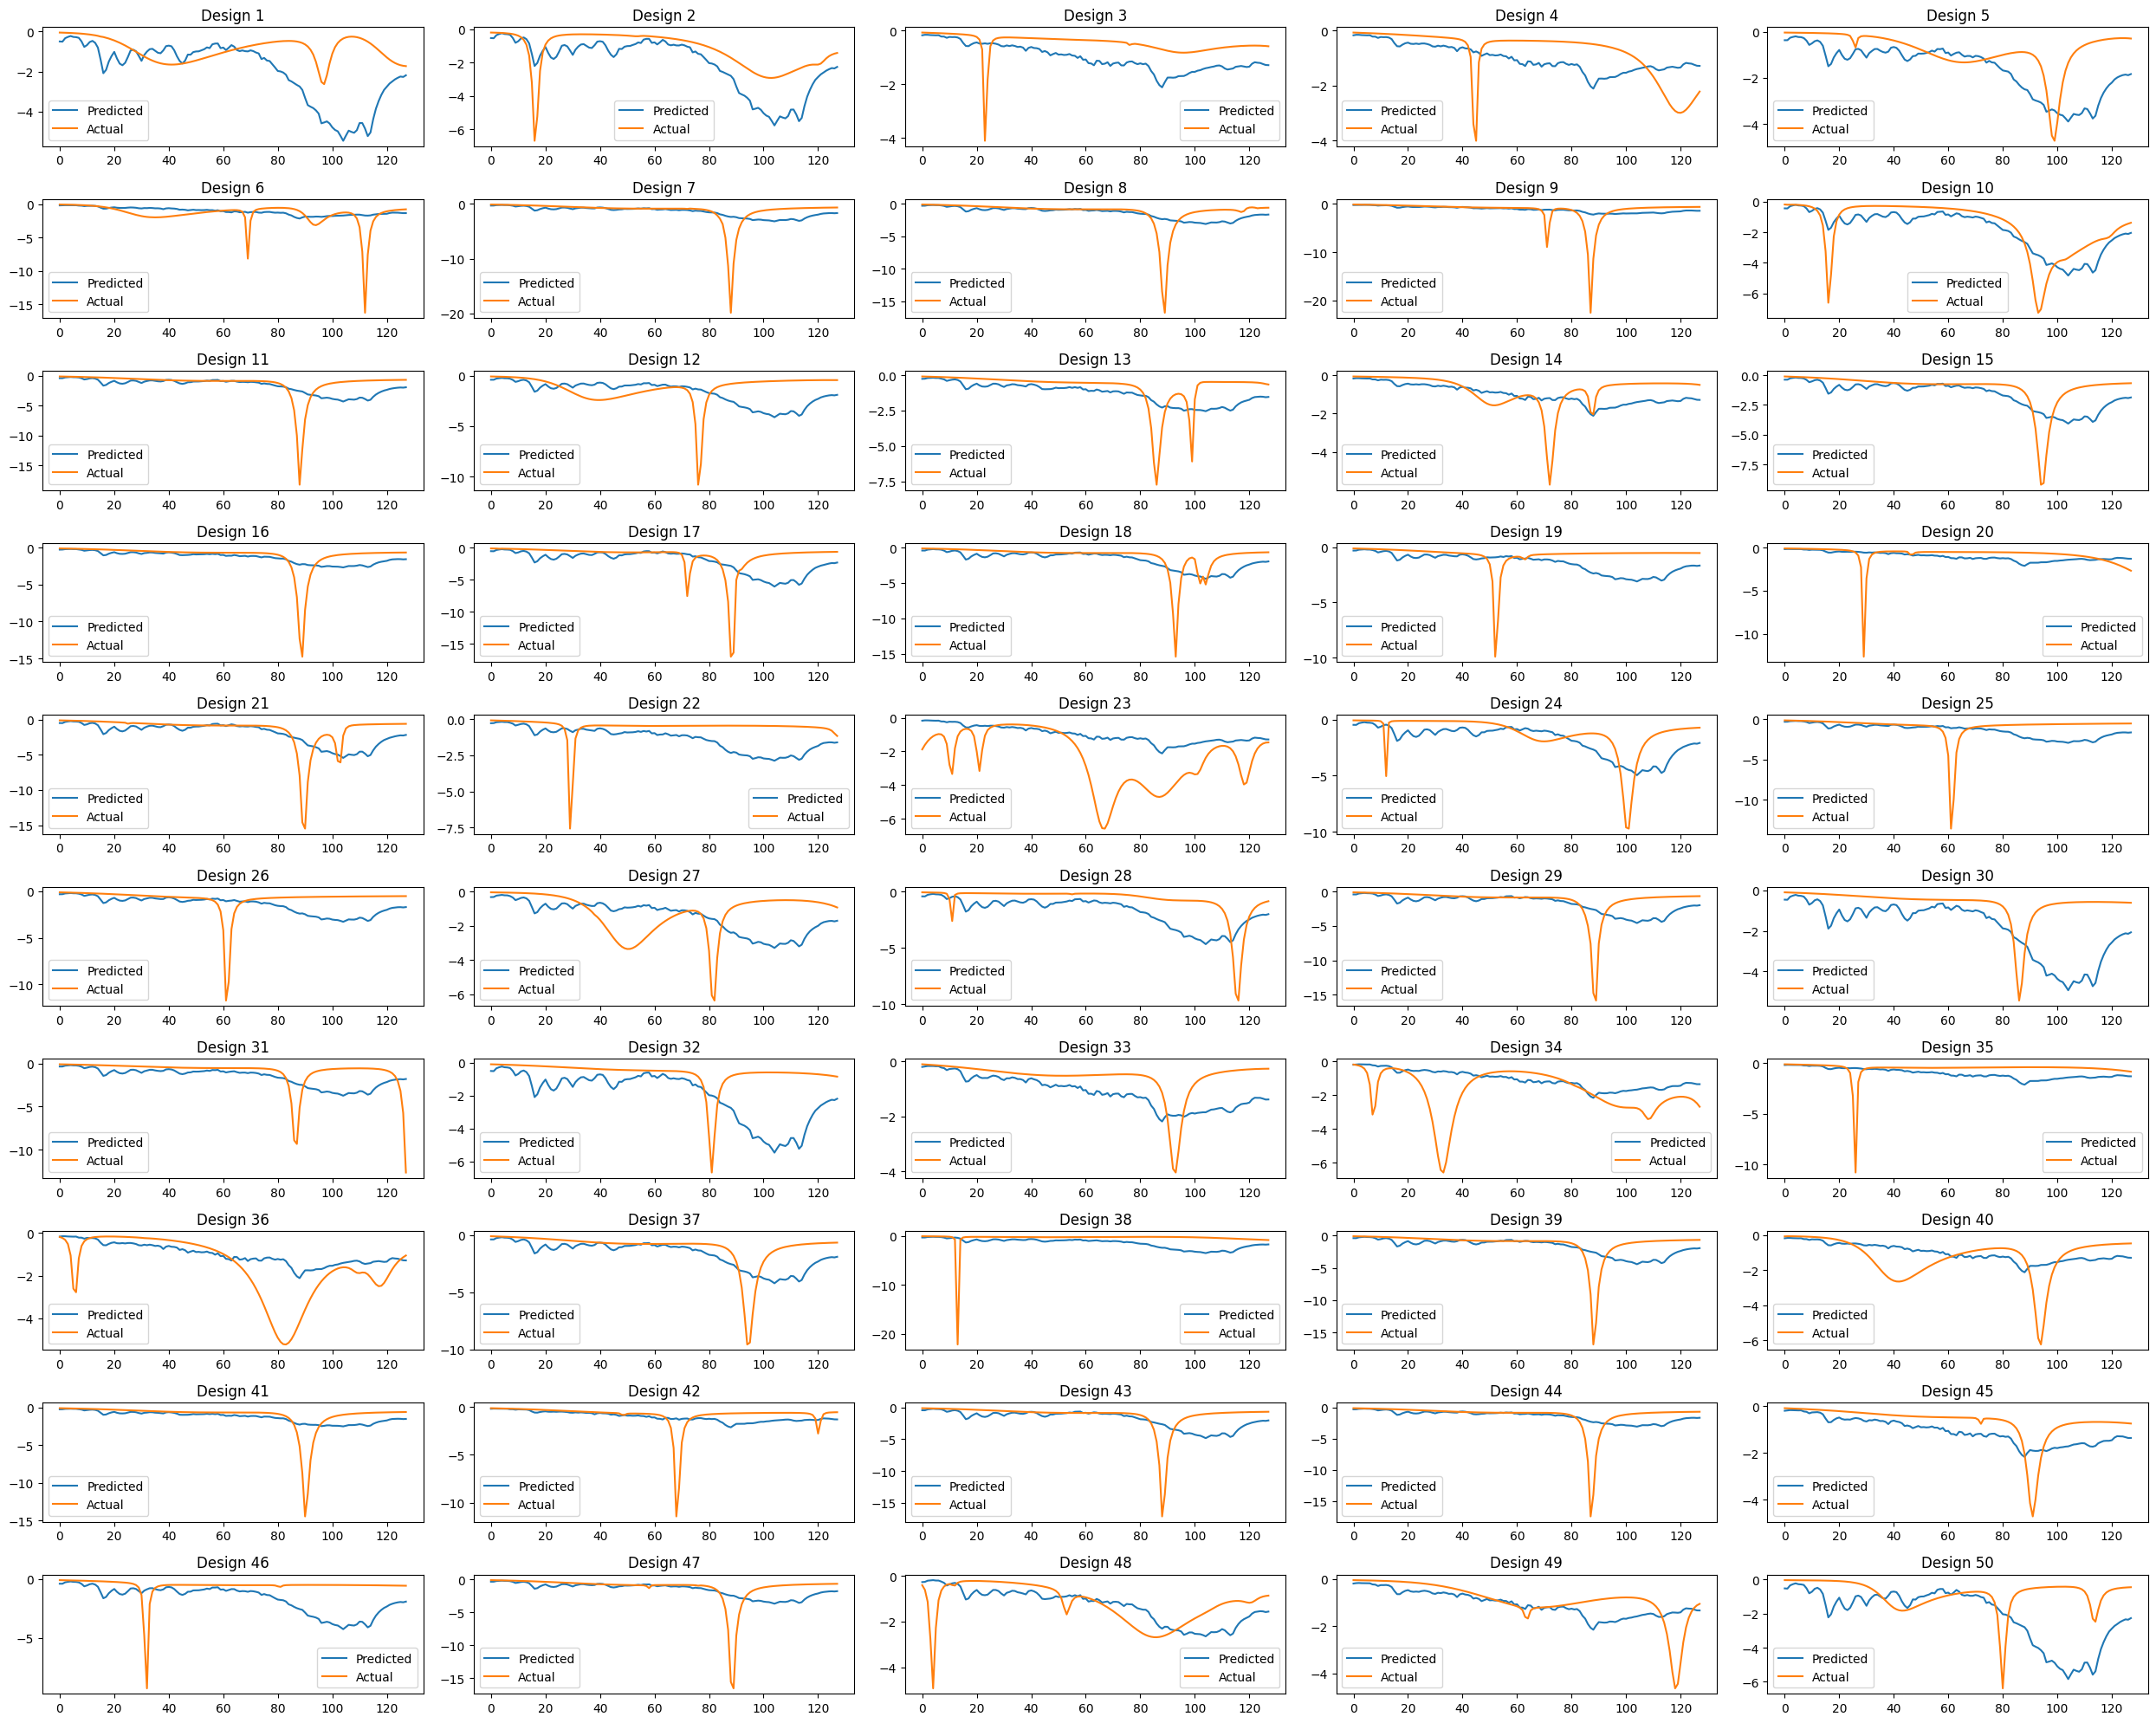

In [308]:
model = CNNModel4()
loss_function= nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0025)
train_loader , validation_loader = load_data_CNN()
model,validation_loader1=train_model2(model, train_loader, validation_loader, optimizer, loss_function, epochs=200)
evaluate_model(model, validation_loader1)
plot_results(model, validation_loader1)

In [160]:
model = DLModel1()
loss_function= nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 1, Train Loss: 2.2472331523895264, Validation Loss: 1.9701699110177846
Epoch 2, Train Loss: 2.019500255584717, Validation Loss: 2.0350612585361185
Epoch 3, Train Loss: 2.0640265941619873, Validation Loss: 2.098704136334933
Epoch 4, Train Loss: 2.9800987243652344, Validation Loss: 2.06239770925962
Epoch 5, Train Loss: 2.334713935852051, Validation Loss: 2.228562675989591
Epoch 6, Train Loss: 1.9611181020736694, Validation Loss: 2.0799833811246433
Epoch 7, Train Loss: 1.8653044700622559, Validation Loss: 2.061223158469567
Epoch 8, Train Loss: 2.3789029121398926, Validation Loss: 2.103376498589149
Epoch 9, Train Loss: 2.493103265762329, Validation Loss: 2.023494316981389
Epoch 10, Train Loss: 2.2584381103515625, Validation Loss: 2.1109221164996805
Epoch 11, Train Loss: 2.3718273639678955, Validation Loss: 1.968880295753479
Epoch 12, Train Loss: 1.7010663747787476, Validation Loss: 2.0081224808326135
Epoch 13, Train Loss: 1.6870657205581665, Validation Loss: 2.0539853481146007
Epoch 

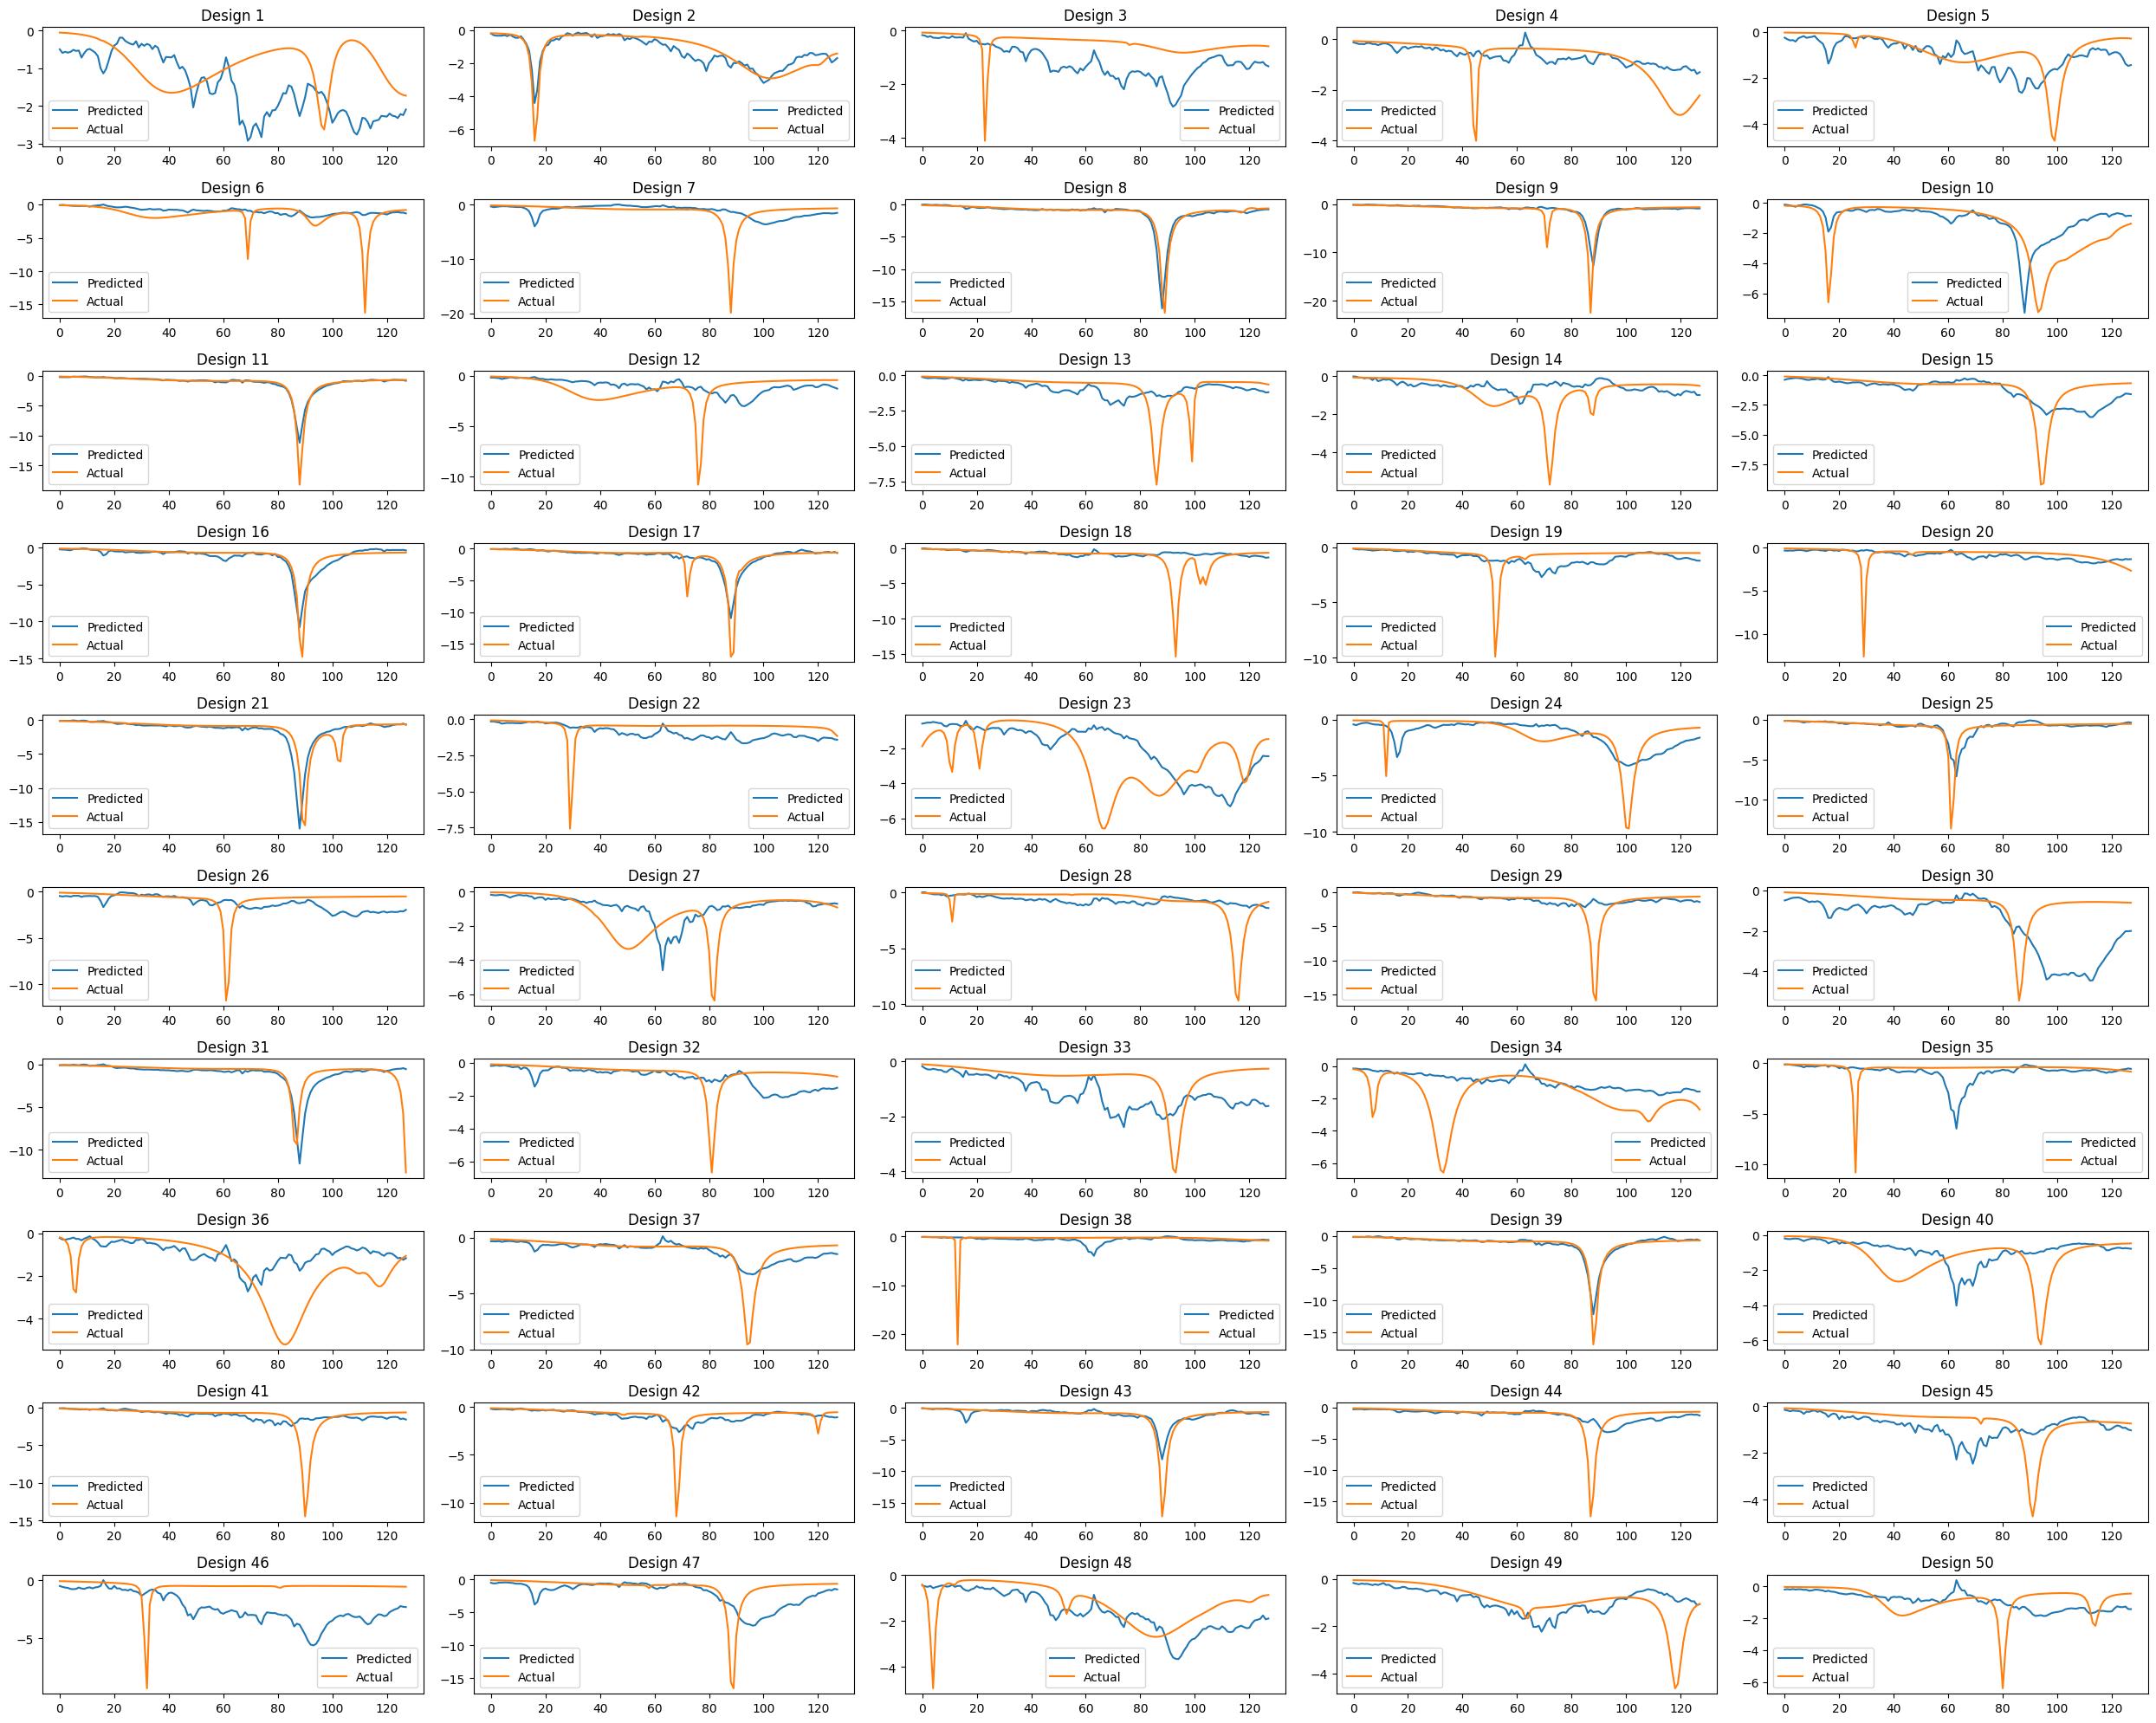

In [162]:
train_loader , validation_loader = load_data2()
model,validation_loader1=train_model(model, train_loader, validation_loader, optimizer, loss_function, epochs=100)

evaluate_model(model, validation_loader1)
plot_results(model, validation_loader1)

Epoch 1, Train Loss: 1.893621802330017, Validation Loss: 2.3029364347457886
Epoch 2, Train Loss: 1.7622085809707642, Validation Loss: 2.256446737509507
Epoch 3, Train Loss: 1.9112194776535034, Validation Loss: 2.3531829302127543
Epoch 4, Train Loss: 1.7287181615829468, Validation Loss: 2.272929842655475
Epoch 5, Train Loss: 1.9112052917480469, Validation Loss: 2.3183538638628445
Epoch 6, Train Loss: 1.7095378637313843, Validation Loss: 2.2280555229920607
Epoch 7, Train Loss: 1.7400480508804321, Validation Loss: 2.2266182624376736
Epoch 8, Train Loss: 1.704426646232605, Validation Loss: 2.2227075833540697
Epoch 9, Train Loss: 1.7422541379928589, Validation Loss: 2.2166736859541674
Epoch 10, Train Loss: 1.69391930103302, Validation Loss: 2.216264559672429
Epoch 11, Train Loss: 1.764254093170166, Validation Loss: 2.2656629910835853
Epoch 12, Train Loss: 1.7196437120437622, Validation Loss: 2.215941364948566
Epoch 13, Train Loss: 1.6854195594787598, Validation Loss: 2.2335294576791616
Epoc

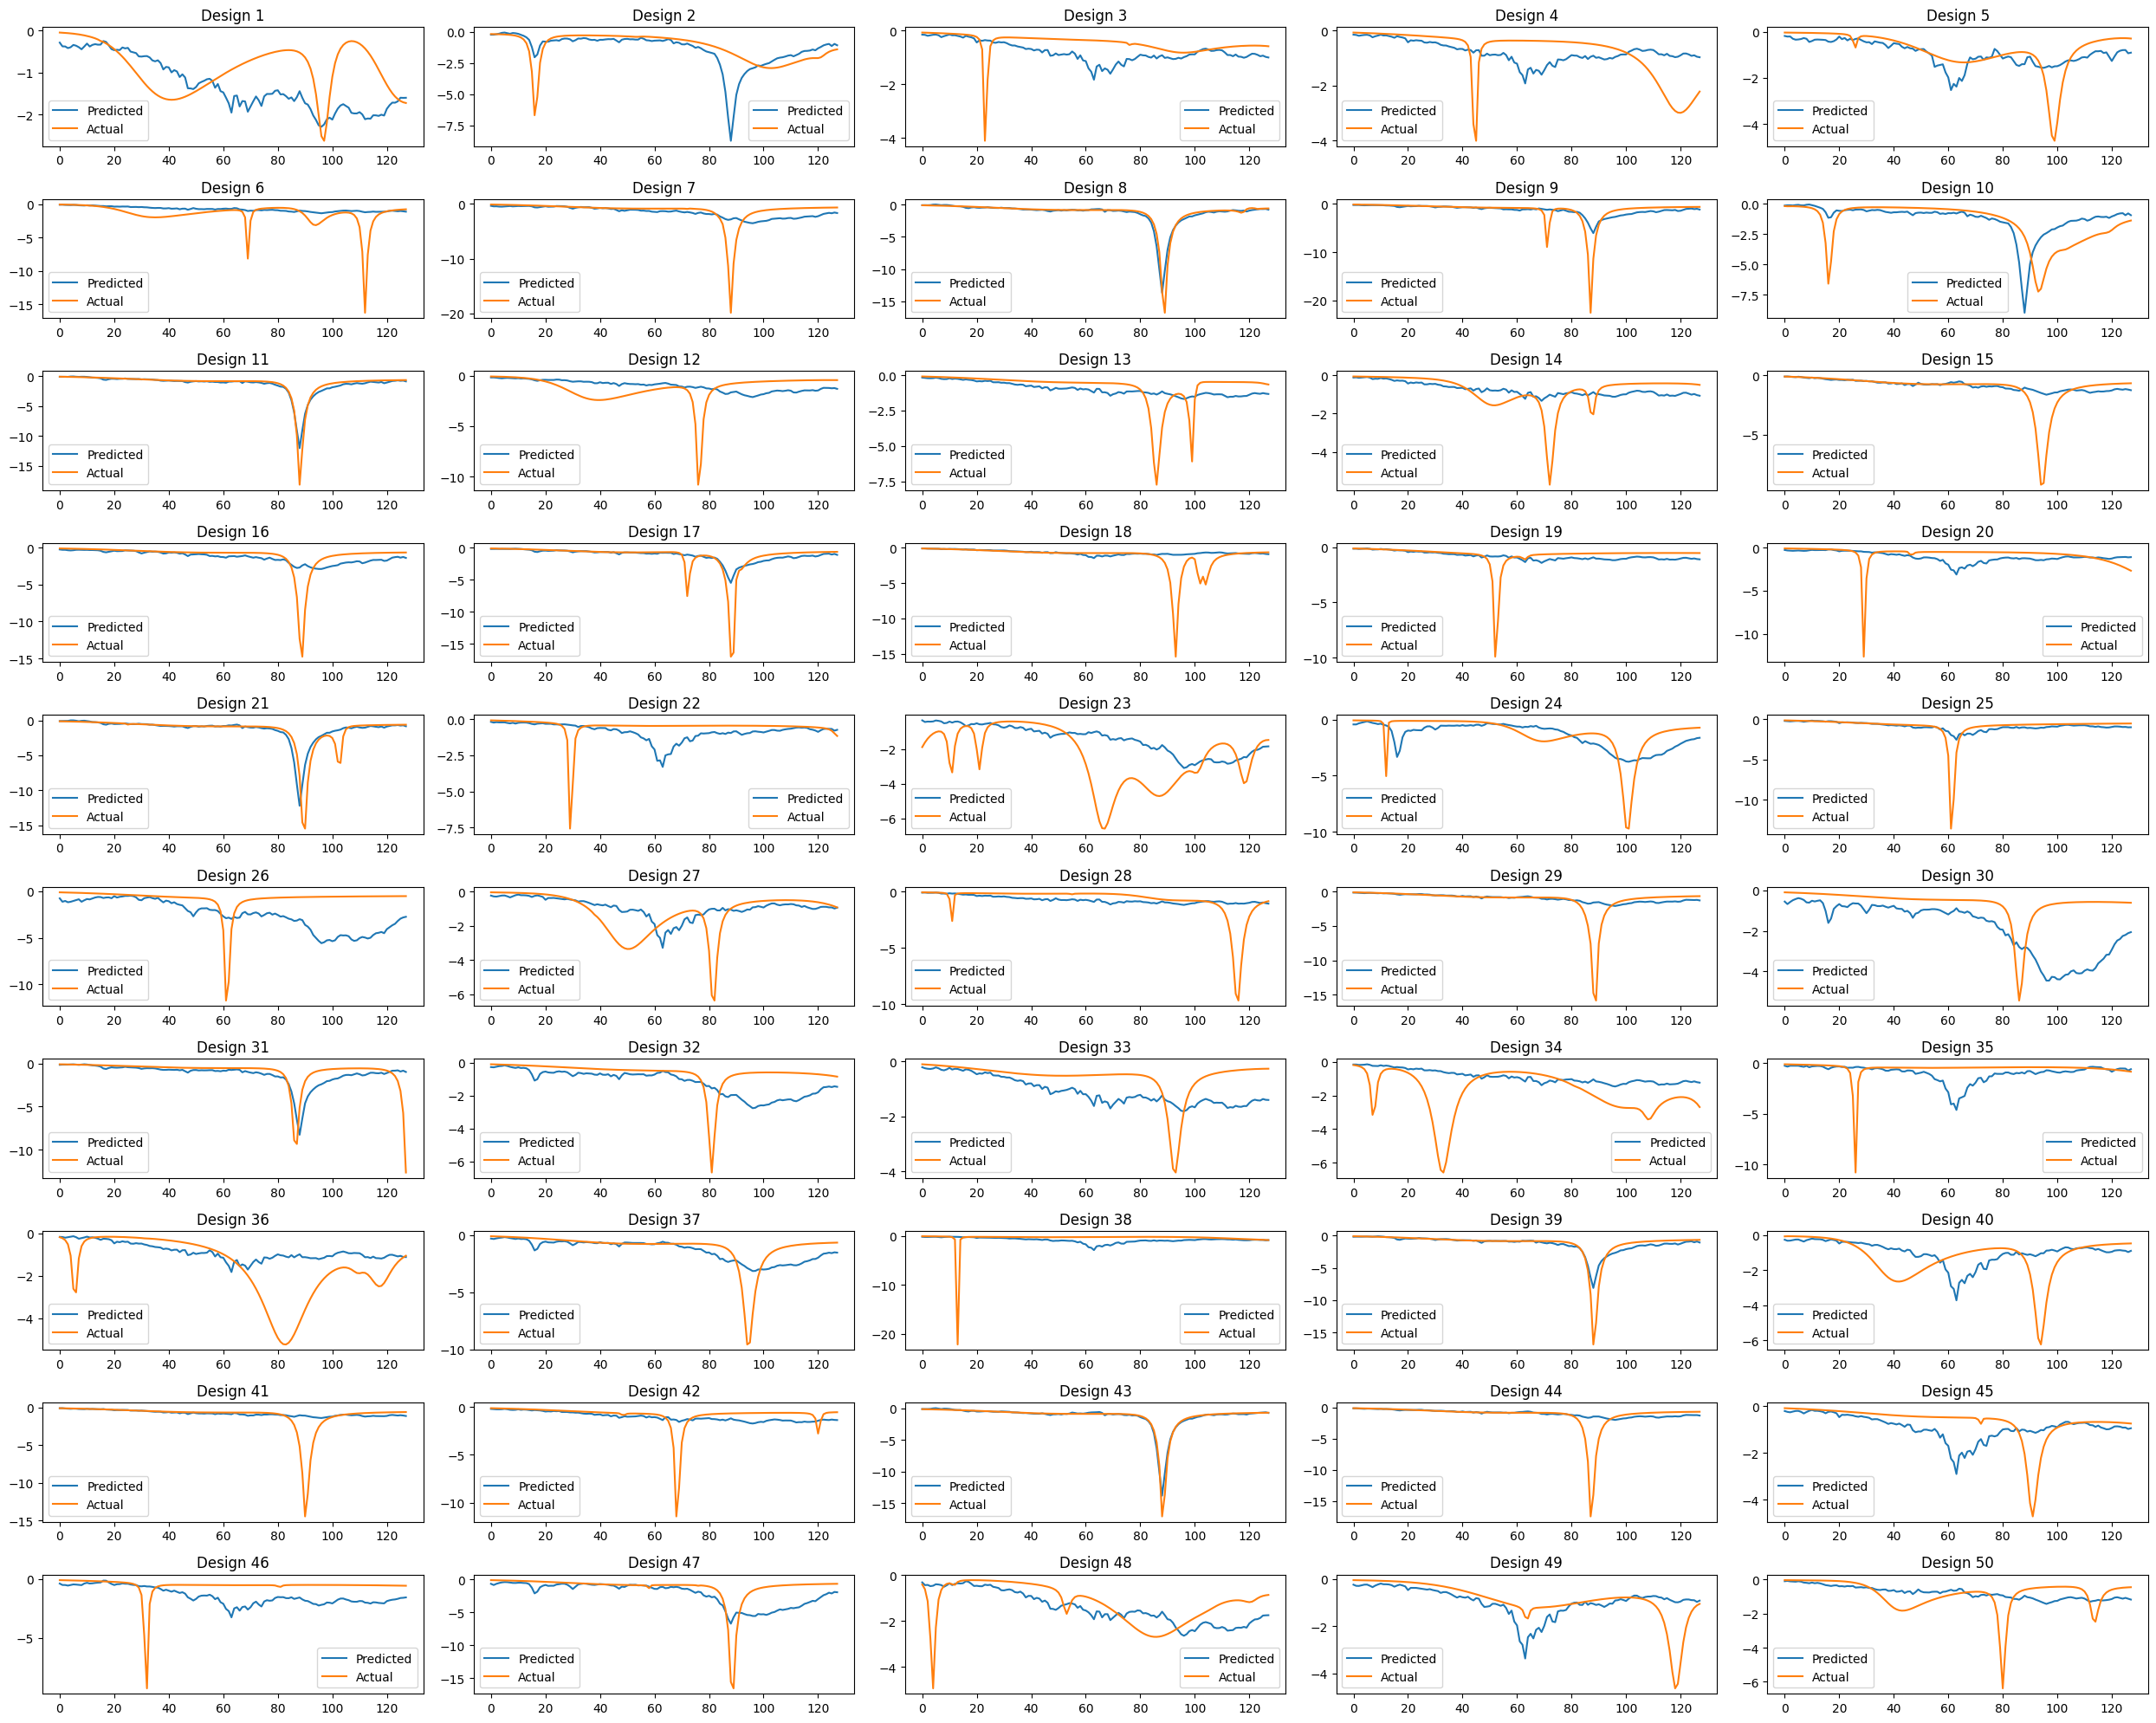

In [163]:
model = DLModel2()
loss_function= nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_loader , validation_loader = load_data2()
model,validation_loader1=train_model(model, train_loader, validation_loader, optimizer, loss_function, epochs=100)
evaluate_model(model, validation_loader1)
plot_results(model, validation_loader1)

In [ ]:
model = DLModel2()
loss_function= nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0025)
train_loader , validation_loader = load_data2()
model,validation_loader1=train_model(model, train_loader, validation_loader, optimizer, loss_function, epochs=100)
evaluate_model(model, validation_loader1)
plot_results(model, validation_loader1)

In [ ]:
model = DLModel3()
loss_function= nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0025)
train_loader , validation_loader = load_data2()
model,validation_loader1=train_model(model, train_loader, validation_loader, optimizer, loss_function, epochs=100)
evaluate_model(model, validation_loader1)
plot_results(model, validation_loader1)

In [ ]:
model = DLModel4()
loss_function= nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0025)
train_loader , validation_loader = load_data2()
model,validation_loader1=train_model(model, train_loader, validation_loader, optimizer, loss_function, epochs=100)
evaluate_model(model, validation_loader1)
plot_results(model, validation_loader1)

Epoch 1, Train Loss: 0.050009094178676605, Validation Loss: 0.49692412465810776
Epoch 2, Train Loss: 0.07273254543542862, Validation Loss: 0.5571176501966658
Epoch 3, Train Loss: 0.08873401582241058, Validation Loss: 0.5299893337346259
Epoch 4, Train Loss: 0.1011204719543457, Validation Loss: 0.5538701964985757
Epoch 5, Train Loss: 0.06262359023094177, Validation Loss: 0.5214642201151166
Epoch 6, Train Loss: 0.06520378589630127, Validation Loss: 0.4969459426190172
Epoch 7, Train Loss: 0.05711944028735161, Validation Loss: 0.493513038115842
Epoch 8, Train Loss: 0.09501699358224869, Validation Loss: 0.4847168457650003
Epoch 9, Train Loss: 0.07496766746044159, Validation Loss: 0.496637510401862
Epoch 10, Train Loss: 0.0771559476852417, Validation Loss: 0.5049702844449452
Epoch 11, Train Loss: 0.056655168533325195, Validation Loss: 0.4908335487402621
Epoch 12, Train Loss: 0.06468293070793152, Validation Loss: 0.4812936433369205
Epoch 13, Train Loss: 0.05503763630986214, Validation Loss: 0.

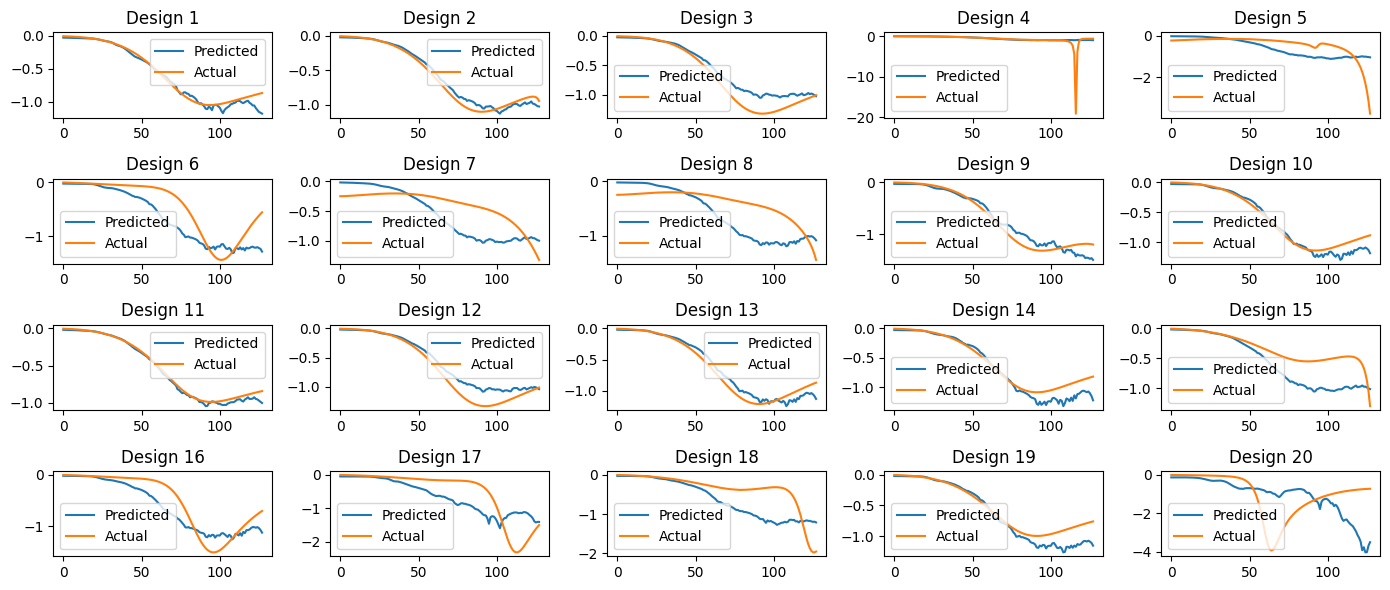

In [64]:
model = DLModel5()
loss_function= nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0025)
train_loader , validation_loader = load_data2()
model,validation_loader1=train_model(model, train_loader, validation_loader, optimizer, loss_function, epochs=100)
evaluate_model(model, validation_loader1)
plot_results(model, validation_loader1)

Epoch 1, Train Loss: 0.0715511292219162, Validation Loss: 0.4658950517574946
Epoch 2, Train Loss: 0.08639957010746002, Validation Loss: 0.47321974769944236
Epoch 3, Train Loss: 0.0454644039273262, Validation Loss: 0.4753349320519538
Epoch 4, Train Loss: 0.06039022281765938, Validation Loss: 0.46096123417928103
Epoch 5, Train Loss: 0.06513716280460358, Validation Loss: 0.46454177442051114
Epoch 6, Train Loss: 0.04865816608071327, Validation Loss: 0.4622940202908857
Epoch 7, Train Loss: 0.050523631274700165, Validation Loss: 0.46140808292797636
Epoch 8, Train Loss: 0.09553595632314682, Validation Loss: 0.4806629312889917
Epoch 9, Train Loss: 0.052809715270996094, Validation Loss: 0.4698641076683998
Epoch 10, Train Loss: 0.05925999954342842, Validation Loss: 0.46156123049912
Epoch 11, Train Loss: 0.052211612462997437, Validation Loss: 0.4673630696322237
Epoch 12, Train Loss: 0.05537853389978409, Validation Loss: 0.4599607711037
Epoch 13, Train Loss: 0.061888813972473145, Validation Loss: 

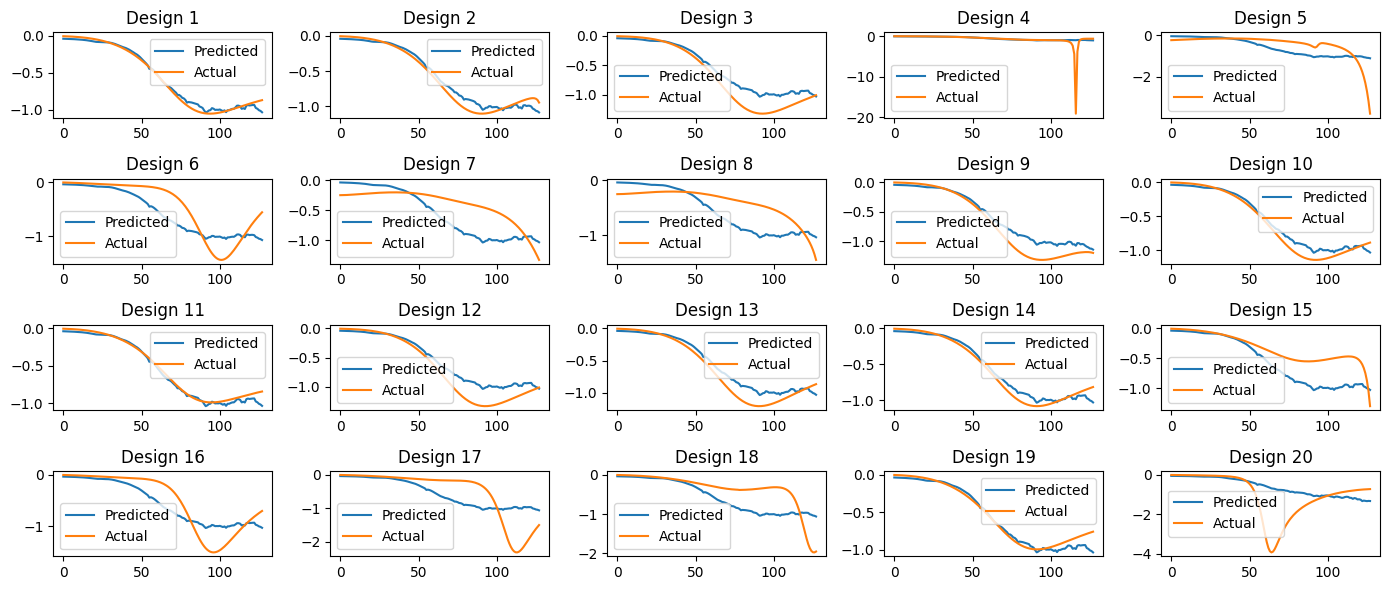

In [74]:
model = DLModel6()
loss_function= nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0025)
train_loader , validation_loader = load_data()
model,validation_loader1=train_model(model, train_loader, validation_loader, optimizer, loss_function, epochs=100)
evaluate_model(model, validation_loader1)
plot_results(model, validation_loader1)

In [32]:
class AntennaModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_rate):
        super(AntennaModel, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.BatchNorm1d(hidden_size))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate))
        
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
        
        layers.append(nn.Linear(hidden_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


In [33]:
train_loader , validation_loader = load_data()

In [36]:
import itertools
import numpy as np

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    best_model = None
    best_loss = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        for features, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for features, targets in val_loader:
                outputs = model(features)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        
        print(f"Epoch {epoch+1}, Train Loss: {loss.item()}, Validation Loss: {val_loss / len(val_loader)}")
        val_loss /= len(val_loader)
        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model.state_dict()

    return best_model, best_loss

# Define hyperparameter grid
hidden_sizes = [128, 256, 512,1024]
num_layers = [2, 3, 4]
dropout_rates = [0.2, 0.4, 0.5]
learning_rates = [0.001, 0.0001,0.0025]
num_epochs = 50

# Track the best configuration
best_config = None
best_model_state = None
best_loss = float('inf')

# Criterion
criterion = nn.MSELoss()

# Grid search
for hidden_size, num_layer, dropout_rate, learning_rate in itertools.product(hidden_sizes, num_layers, dropout_rates, learning_rates):
    model = AntennaModel(input_size=216, hidden_size=hidden_size, output_size=128, num_layers=num_layer, dropout_rate=dropout_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    best_model_state, val_loss = train_model(model, criterion, optimizer, train_loader, validation_loader, num_epochs)
    
    if val_loss < best_loss:
        best_loss = val_loss
        best_config = {
            'hidden_size': hidden_size,
            'num_layers': num_layer,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate
        }

# Print the best configuration
print("Best Configuration:", best_config)
print("Validation Loss:", best_loss)


Epoch 1, Train Loss: 0.057237230241298676, Validation Loss: 0.5006517931109383
Epoch 2, Train Loss: 0.09835658967494965, Validation Loss: 0.5409247094676608
Epoch 3, Train Loss: 0.09524897485971451, Validation Loss: 0.5190729236318952
Epoch 4, Train Loss: 0.09019915759563446, Validation Loss: 0.4834917765997705
Epoch 5, Train Loss: 0.07625137269496918, Validation Loss: 0.49523872491859255
Epoch 6, Train Loss: 0.06578145921230316, Validation Loss: 0.5135146720068795
Epoch 7, Train Loss: 0.05524631589651108, Validation Loss: 0.5188293850847653
Epoch 8, Train Loss: 0.08126681298017502, Validation Loss: 0.48800305241630193
Epoch 9, Train Loss: 0.08477599918842316, Validation Loss: 0.5000917822832153
Epoch 10, Train Loss: 0.06031203269958496, Validation Loss: 0.47753916308283806
Epoch 11, Train Loss: 0.0630325898528099, Validation Loss: 0.501029647177174
Epoch 12, Train Loss: 0.04610998183488846, Validation Loss: 0.48827799906333286
Epoch 13, Train Loss: 0.08707726746797562, Validation Loss